In [79]:
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [80]:
engine = create_engine("sqlite:///Resources/hawaii2.sqlite")

In [81]:
Base = automap_base()

In [82]:
Base.prepare(engine, reflect=True)

In [84]:
Base.classes.keys()

['measurement', 'station']

In [85]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR(225)
date INTEGER
prcp INTEGER
tobs INTEGER


In [95]:
Measure = Base.classes.measurement
Station = Base.classes.station

In [96]:
session = Session(engine)

In [97]:
results = (session
           .query(Measure.date, Measure.prcp)
           .filter(Measure.date >= '2016-08-01')
           .order_by(Measure.date.desc())
           .all())
results

[('2017-08-23', 0),
 ('2017-08-23', 0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-23', 0),
 ('2017-08-23', 0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0),
 ('2017-08-22', 0),
 ('2017-08-22', 0.5),
 ('2017-08-22', 0),
 ('2017-08-22', 0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0),
 ('2017-08-21', 0.02),
 ('2017-08-21', 0.56),
 ('2017-08-21', 0),
 ('2017-08-21', 0.02),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0),
 ('2017-08-20', 0.01),
 ('2017-08-20', 0),
 ('2017-08-20', 0.01),
 ('2017-08-19', 0),
 ('2017-08-19', 0),
 ('2017-08-19', 0.09),
 ('2017-08-19', 0),
 ('2017-08-19', 0),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0),
 ('2017-08-18', 0),
 ('2017-08-18', 0.06),
 ('2017-08-18', 0),
 ('2017-08-18', 0),
 ('2017-08-18', 0.06),
 ('2017-08-17', 0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-17', 0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0),
 ('2017-08-16', 0.07),
 ('2017-08-16

In [98]:
df = pd.DataFrame(results, columns=['date','percp'])
df.set_index('date', inplace=True)
df.head()

,percp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-23,0.00


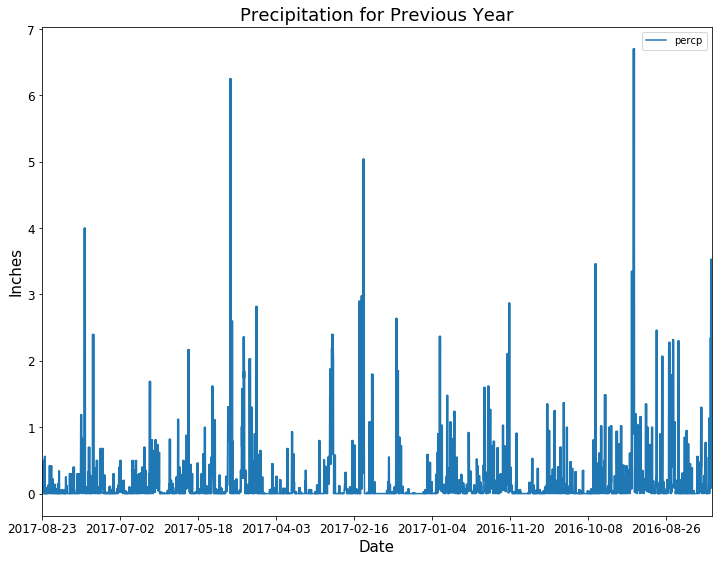

In [99]:
df.plot(figsize=(12,9))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# add title and axis labels
plt.title('Precipitation for Previous Year', fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Inches', fontsize=15)
plt.show()

In [100]:
df.describe()

,percp
count,4296.000000
mean,0.182896
std,0.467284
min,0.000000
25%,0.000000
50%,0.020000
75%,0.140000
max,6.700000


In [102]:
total_stations = (session
                  .query(func.count(Station.name))
                  .scalar())

print(f'There are {total_stations} stations')

There are 9 stations


In [105]:
active_stations = (session
                        .query(Measure.station, func.count(Measure.station))
                        .group_by(Measure.station)
                        .order_by(func.count(Measure.station).desc())
                        .limit(3)
                        .all())

print('The 3 most active stations are:\n')

j = 0
active_station = None

for station in active_stations:
    
    print(f'Station Name: {station[0]}\nMeasure: {station[1]}\n')
    
    if station[1] > j:
        
        active_station = station[0]
        
        j = station[1]
            
print(f'The most active station is {active_station}')

The 3 most active stations are:

Station Name: USC00519281
Measure: 5544

Station Name: USC00513117
Measure: 5392

Station Name: USC00519397
Measure: 5370

The most active station is USC00519281


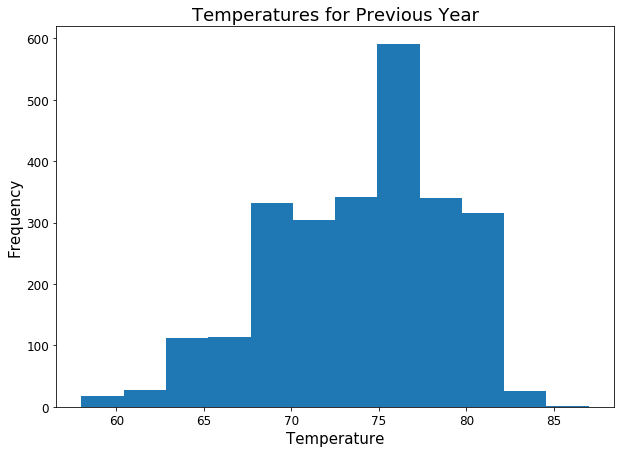

In [106]:
temp = (session
        .query(Measure.tobs)
        .filter(Measure.date > '2017-01-01'))

# create numpy array to hold tobs values
temp_values = []

for tem in temp:
    
    temp_values.append(tem[0])

temp_values = np.array(temp_values)

plt.figure(figsize=(10, 7))
plt.hist(temp_values, bins=12)

# change fontsize of x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# add title and axis labels
plt.title('Temperatures for Previous Year', fontsize=18)
plt.xlabel('Temperature', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

plt.show()